<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation,MaxPooling2D,Dropout
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from tensorflow.keras.models import load_model
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping,LearningRateScheduler,CSVLogger,LambdaCallback,TensorBoard
from keras import regularizers
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2
import seaborn as sns
import math
import os

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
%matplotlib inline

In [ ]:
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
train_path = '/content/drive/MyDrive/New folder (6)/train'
valid_path = '/content/drive/MyDrive/New folder (6)/val'
test_path  = '/content/drive/MyDrive/New folder (6)/test'
train_gen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    channel_shift_range=10.,
    fill_mode="nearest"
)
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

train_batches = train_gen.flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128)

valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224), 
    classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
    classes=['Glioma', 'Meningioma', 'Pituitary tumor'], batch_size=128,shuffle=False)

Found 2450 images belonging to 3 classes.
Found 305 images belonging to 3 classes.
Found 310 images belonging to 3 classes.


In [ ]:
vgg19_model = VGG19() 
model_vgg19 = Sequential() 
for layer in vgg19_model.layers[:-1]: 
    model_vgg19.add(layer) 
for layer in model_vgg19.layers: 
    layer.trainable = False 
    
model_vgg19.add(Dense(3, activation='softmax'))

574726144/574710816 [==============================] - 18s 0us/step


In [ ]:
model_vgg19.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model_vgg19.fit_generator(generator=train_batches,
                                    #steps_per_epoch=len(train_batches),
                                 validation_data=valid_batches, 
                                 #validation_steps=len(valid_batches), 
                                    epochs=50, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
20/20 [==============================] - 2660s 132s/step - loss: 0.5737 - accuracy: 0.5612 - val_loss: 0.4182 - val_accuracy: 0.7377
Epoch 2/50
20/20 [==============================] - 67s 3s/step - loss: 0.3970 - accuracy: 0.7327 - val_loss: 0.3474 - val_accuracy: 0.8000
Epoch 3/50
20/20 [==============================] - 65s 3s/step - loss: 0.3448 - accuracy: 0.7727 - val_loss: 0.3248 - val_accuracy: 0.8000
Epoch 4/50
20/20 [==============================] - 67s 3s/step - loss: 0.3289 - accuracy: 0.7841 - val_loss: 0.2988 - val_accuracy: 0.8295
Epoch 5/50
20/20 [==============================] - 66s 3s/step - loss: 0.3176 - accuracy: 0.7992 - val_loss: 0.2871 - val_accuracy: 0.8426
Epoch 6/50
20/20 [==============================] - 67s 3s/step - loss: 0.3067 - accuracy: 0.8082 - val_loss: 0.2730 - val_accuracy: 0.8393
Epoch 7/50
20/20 [==============================] - 66s 3s/step - loss: 0.3008 - accuracy: 0.8159 - val_loss: 0.2830 - val_accuracy: 0.8525
Epoch 8/50
20/20

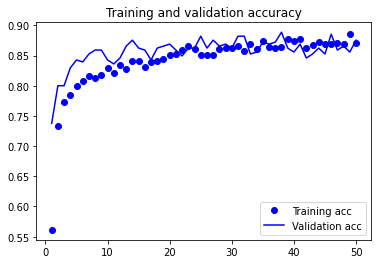

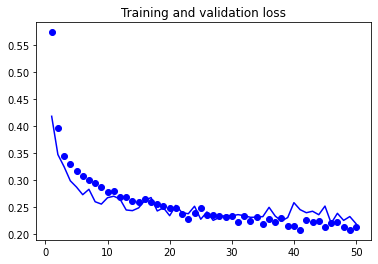

In [ ]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.savefig('accuracy.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


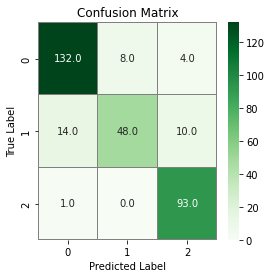

<Figure size 432x288 with 0 Axes>

In [ ]:
predictions_1 = test_model.predict_generator(generator=test_batches, steps=len(test_batches), verbose=0)

pred_label = np.argmax(predictions_1,axis=1)
classes = np.argmax(predictions_1, axis=1)
cm = confusion_matrix(test_batches.labels,pred_label)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('confusion_matrix.png')

In [ ]:
from tensorflow.keras.models import load_model

model_vgg19.save('model_vgg19.h5')

In [ ]:
test_model = load_model('model_vgg19.h5')

In [ ]:
predictions = test_model.predict_generator(test_batches, steps=1, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
rounded_prediction = np.argmax(predictions, axis=-1)
for i in rounded_prediction:
    print(i)

0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
1
2
0
0
0
0
0
0
1
0
1
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [ ]:
rounded_labels = np.argmax(test_labels, axis=-1)

In [ ]:
cm = confusion_matrix(y_true=test_batches.labels, y_pred=pred_label)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(y_true=test_batches.labels, y_pred=pred_label))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       144
           1       0.86      0.67      0.75        72
           2       0.87      0.99      0.93        94

    accuracy                           0.88       310
   macro avg       0.87      0.86      0.86       310
weighted avg       0.88      0.88      0.88       310



Confusion matrix, without normalization
[[132   8   4]
 [ 14  48  10]
 [  1   0  93]]


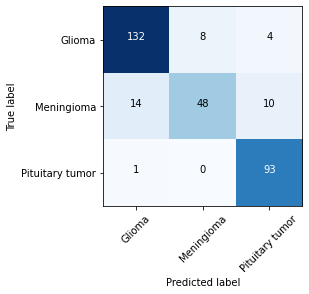

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Glioma','Meningioma', 'Pituitary tumor']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


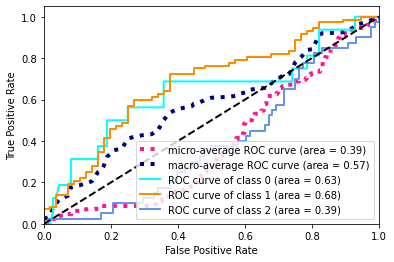

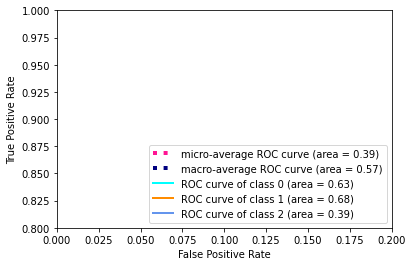

In [ ]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
classes = dict((v, k) for k, v in test_batches.class_indices.items())
num_classes = len(classes)
num_samples = len(test_batches)

In [ ]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [ ]:
def plot_roc_curve(y_test, y_pred):
     n_classes = len(np.unique(y_test))
     y_test = label_binarize(y_test, classes=np.arange(n_classes))

     # Compute ROC curve and ROC area for each class
     fpr = dict()
     tpr = dict()
     roc_auc = dict()
     thresholds = dict()
     for i in range(n_classes):
       fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred[:, i], drop_intermediate=False)
     roc_auc[i] = auc(fpr[i], tpr[i])

     # Compute micro-average ROC curve and ROC area
     fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
     roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

     # First aggregate all false positive rates
     all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

     # Then interpolate all ROC curves at this points
     mean_tpr = np.zeros_like(all_fpr)
     for i in range(n_classes):
       mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

     # Finally average it and compute AUC
     mean_tpr /= n_classes

     fpr["macro"] = all_fpr
     tpr["macro"] = mean_tpr
     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

     # Plot all ROC curves
     #plt.figure(figsize=(10,5))
     plt.figure(dpi=600)
     lw = 2
     plt.plot(fpr["micro"], tpr["micro"],
     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
     color="deeppink", linestyle=":", linewidth=4,)

     plt.plot(fpr["macro"], tpr["macro"],
     label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
     color="navy", linestyle=":", linewidth=4,)

     colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
     for i, color in zip(range(n_classes), colors):
       plt.plot(fpr[i], tpr[i], color=color, lw=lw,
       label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

     plt.plot([0, 1], [0, 1], "k--", lw=lw)
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel("False Positive Rate")
     plt.ylabel("True Positive Rate")
     plt.title("Receiver Operating Characteristic (ROC) curve")
     plt.legend()

In [ ]:
test_model = load_model('model_vgg16.h5')

In [ ]:
plot_roc_curve(test_batches,  predictions )